## Tesla + NVIDIA Stock Analysis (5 years)

###  Table of content
##### [Installation and Importation](#Installation-and-Importation)
##### [Data Collection](#Data-Collection)
##### [NumPy Calculations](#NumPy-Calculations)
##### [Pandas Analysis](#Pandas-Analysis)
##### [Comparative Metrics (2024-2025)](#Comparative-Metrics-2024-2025)
##### [Visualization](#Visualization)
##### [Portfolio Simulation](#Portfolio-Simulation)
##### [Insights](#Insights)

### Introduction
##### This notebook analyzes Tesla (TSLA) and NVIDIA (NVDA) over the past 5 years.
##### It compares risk-return metrics, cumulative growth, and portfolio construction.
##### The project demonstrates NumPy, Pandas, and Matplotlib for financial analysis,
##### with a focus on insights and storytelling.

### Installation and Importation

In [1]:
# Install dependencies (works for Google Colab or fresh environments)
!pip install -r https://raw.githubusercontent.com/wammiri/TESLA-NVIDIA-Stock-Analysis-5Y/main/requirements.txt


In [2]:
!pip install yfinance --upgrade --quiet

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

sns.set(style="whitegrid", context="talk")

### Data Collection

In [3]:
tickers = ["TSLA", "NVDA"]
extra_tickers = ["AAPL", "MSFT", "SPY", "JNJ"]
all_tickers = tickers + extra_tickers

PERIOD = "5y"
INTERVAL = "1d"
TRADING_DAYS = 252
ROLL_WINDOW = 30
risk_free_rate = 0.04

# Download adjusted close prices
stock_data = yf.download(all_tickers, period=PERIOD, interval=INTERVAL)["Close"]

# Focus on Tesla & Nvidia
stock_data = stock_data[tickers]

stock_data.head()

/tmp/ipython-input-4226518742.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(all_tickers, period=PERIOD, interval=INTERVAL)["Close"]
[*********************100%***********************]  6 of 6 completed


Ticker,TSLA,NVDA
Date,,
2020-10-26,140.093338,13.101254
2020-10-27,141.559998,13.355981
2020-10-28,135.339996,12.588573
2020-10-29,136.943329,12.984363
2020-10-30,129.346664,12.495855


### NumPy Calculations

In [4]:
stock_close = stock_data.values

# Daily returns
daily_rtn = (stock_close[1:] - stock_close[:-1]) / stock_close[:-1]

# Mean return & volatility
mean_rtn = daily_rtn.mean(axis=0)
stock_std = daily_rtn.std(axis=0)

# Cumulative returns
cum_rtn = np.cumprod(1 + daily_rtn, axis=0) - 1

for ticker, mean, std in zip(tickers, mean_rtn, stock_std):
    print(f"{ticker}: Avg Daily Return {mean:.2%}, Std Dev {std:.2%}")

TSLA: Avg Daily Return 0.17%, Std Dev 3.86%
NVDA: Avg Daily Return 0.26%, Std Dev 3.29%


### Pandas Analysis

In [5]:
# Build MultiIndex DataFrame for TSLA & NVDA
returns_df = pd.DataFrame(daily_rtn, index=stock_data.index[1:], columns=tickers)

stock_df = pd.concat({
    "Close": stock_data,
    "Daily Return": returns_df,
    "Cumulative Return": pd.DataFrame(cum_rtn, index=returns_df.index, columns=tickers)
}, axis=1)

# Rolling 30d volatility
volatility = returns_df.rolling(window=ROLL_WINDOW).std()
stock_df[("Volatility 30d", "TSLA")] = volatility["TSLA"]
stock_df[("Volatility 30d", "NVDA")] = volatility["NVDA"]

# Yearly averages
yearly_avg = returns_df.groupby(returns_df.index.year).mean()
yearly_avg

,TSLA,NVDA
Date,,
2020,0.012061,0.000173
2021,0.002188,0.003628
2022,-0.003293,-0.001991
2023,0.003387,0.005338
2024,0.002709,0.004507
2025,0.001401,0.002041


**Insights:**  
- Tesla dominated 2020 with exceptionally strong daily returns, while NVIDIA lagged.  
- From 2021 onward, NVIDIA showed more consistent strength, especially in 2023–2024.  
- Both stocks struggled in 2022, but NVIDIA’s drawdown was less severe.  
- Year-to-date 2025, NVIDIA continues to outperform Tesla on average daily returns.  
- Overall: Tesla had the early surge, but NVIDIA has been the steadier compounder in recent years.  


### Helper Functions

In [6]:
def get_metrics(price_df, trading_days=252):
    """Compute key performance metrics from daily price data."""
    daily_rtn = price_df.pct_change().dropna()

    mean = daily_rtn.mean()
    ann_return = (1 + mean) ** trading_days - 1

    std = daily_rtn.std()
    ann_vol = std * np.sqrt(trading_days)

    cum_rtn = (1 + daily_rtn).cumprod() - 1
    final_cum_rtn = cum_rtn.iloc[-1]

    sharpe = (ann_return-risk_free_rate) / ann_vol

    consistency = (daily_rtn > 0).mean()

    running_max = (1 + daily_rtn).cumprod().cummax()
    drawdown = (1 + daily_rtn).cumprod() / running_max - 1
    mdd = drawdown.min()

    summary = pd.DataFrame({
        "Final Cumulative Return": final_cum_rtn,
        "Annualized Return": ann_return,
        "Annualized Volatility": ann_vol,
        "Sharpe Ratio (rf=4%)": sharpe,
        "Max Drawdown": mdd,
        "Hit Rate": consistency
    })

    return summary

### Comparative Metrics (2024–2025)

In [7]:
analysis_data = stock_df["Close"].loc["2024-01-01":]
summary = get_metrics(analysis_data)

summary.style.format("{:.2%}")

,Final Cumulative Return,Annualized Return,Annualized Volatility,Sharpe Ratio (rf=4%),Max Drawdown,Hit Rate
Ticker,,,,,,
TSLA,80.73%,70.97%,65.07%,102.92%,-53.77%,50.44%
NVDA,278.37%,139.64%,52.25%,259.59%,-36.88%,55.29%


**Insights:**  
- NVIDIA massively outperformed Tesla on both cumulative and annualized returns.  
- Tesla carried higher volatility but didn’t deliver higher returns — weaker risk efficiency.  
- NVIDIA’s Sharpe ratio shows much stronger risk-adjusted performance.  
- Tesla suffered deeper drawdowns, making it a bumpier ride for investors.  
- NVIDIA also had a higher “hit rate,” meaning it delivered gains more consistently day to day.  
- Bottom line: NVIDIA has been the superior long-term investment across both raw and risk-adjusted metrics.  


### Visualization

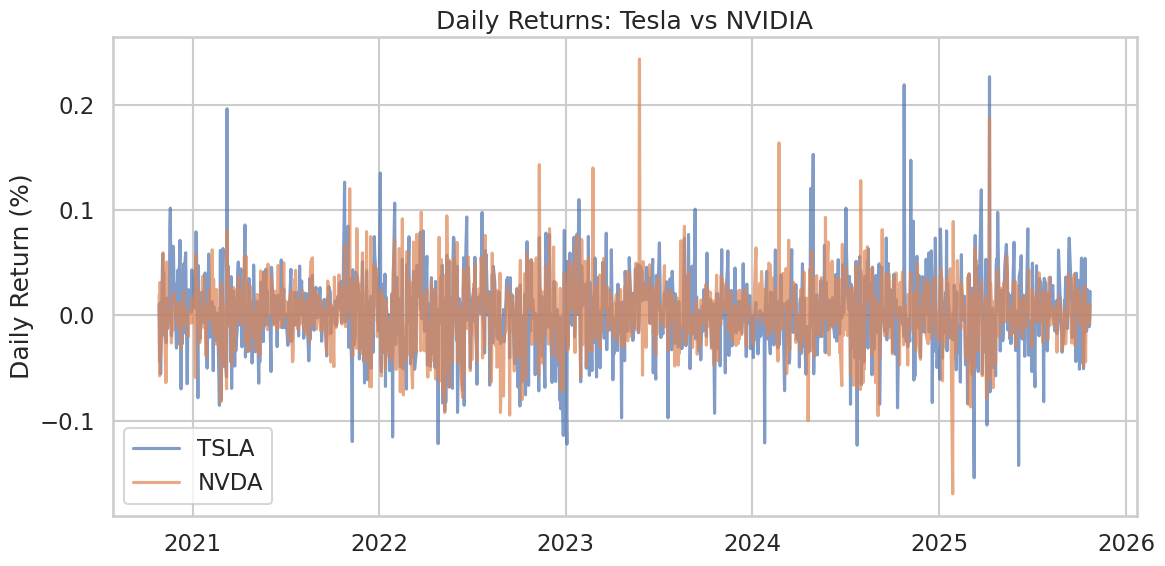

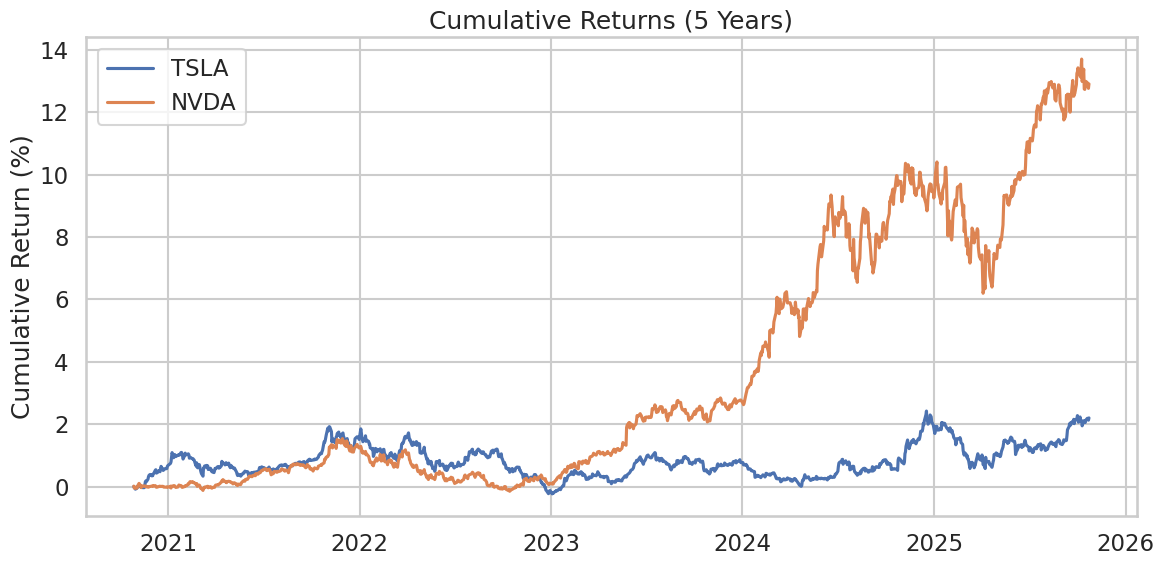

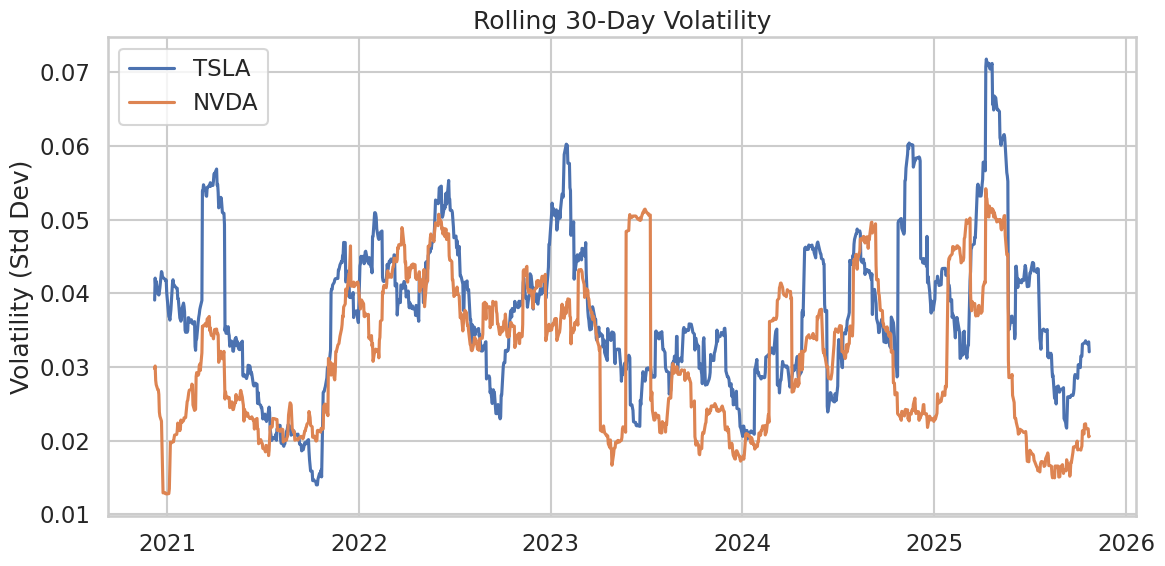

In [8]:
plt.figure(figsize=(12,6))
plt.plot(stock_df.index, stock_df[("Daily Return","TSLA")], label="TSLA", alpha=0.7)
plt.plot(stock_df.index, stock_df[("Daily Return","NVDA")], label="NVDA", alpha=0.7)
plt.title("Daily Returns: Tesla vs NVIDIA")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(stock_df.index, stock_df[("Cumulative Return","TSLA")], label="TSLA")
plt.plot(stock_df.index, stock_df[("Cumulative Return","NVDA")], label="NVDA")
plt.title("Cumulative Returns (5 Years)")
plt.ylabel("Cumulative Return (%)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(stock_df.index, stock_df[("Volatility 30d","TSLA")], label="TSLA")
plt.plot(stock_df.index, stock_df[("Volatility 30d","NVDA")], label="NVDA")
plt.title("Rolling 30-Day Volatility")
plt.ylabel("Volatility (Std Dev)")
plt.legend()
plt.tight_layout()
plt.show()

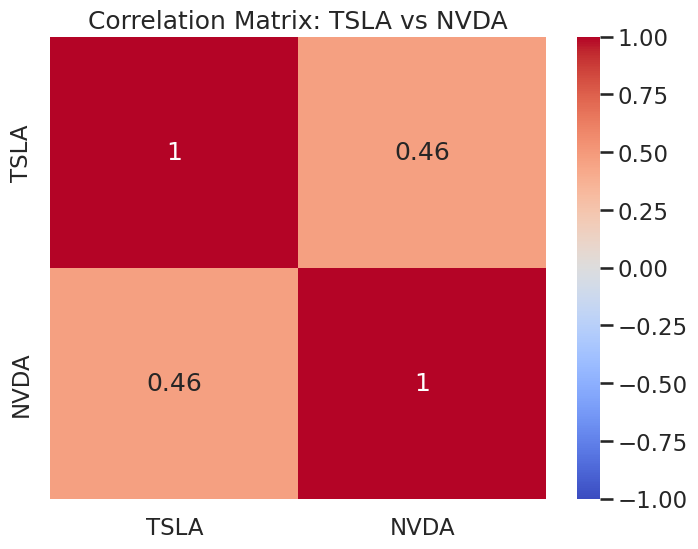

Correlation between TSLA and NVDA: 0.4619587725180511


In [9]:
# Assuming 'returns' is a DataFrame with daily returns for TSLA and NVDA
correlation_matrix = returns_df[['TSLA', 'NVDA']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: TSLA vs NVDA')
plt.show()
print("Correlation between TSLA and NVDA:", correlation_matrix.iloc[0, 1])

### Portfolio Simulation

Tesla final value: 32048.63395757191
NVIDIA final value: 139040.12335142022
50/50 Portfolio final value: 84866.572520729


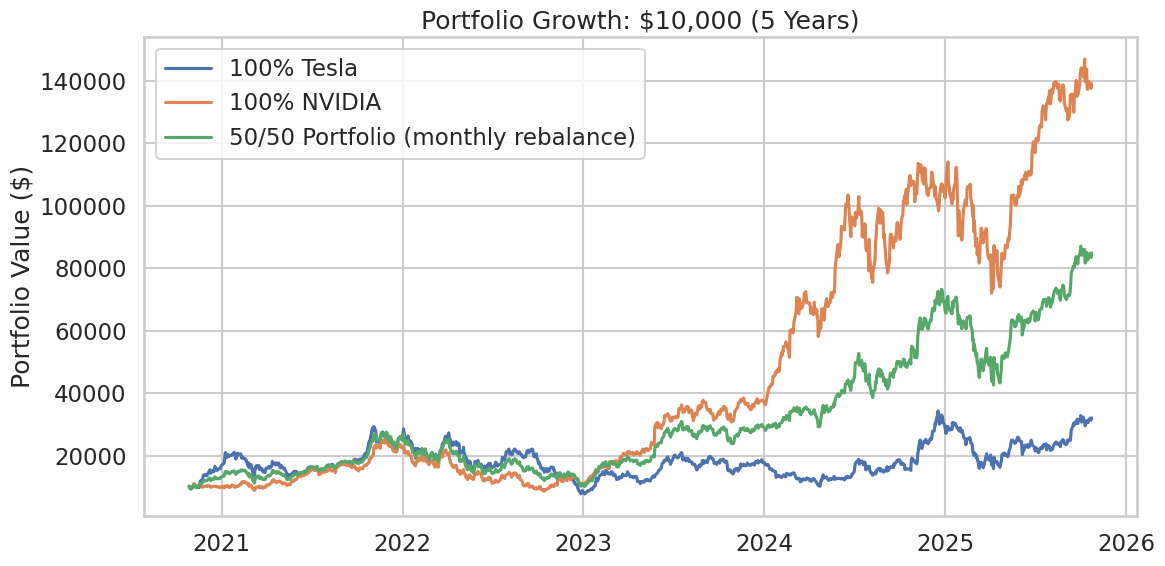

In [10]:
initial_investment = 10000
tsla_growth = (1 + returns_df["TSLA"]).cumprod() * initial_investment
nvda_growth = (1 + returns_df["NVDA"]).cumprod() * initial_investment

portfolio = []
current_value = initial_investment

for _, group in returns_df.groupby(returns_df.index.to_period("M")):
    tsla_value = current_value * 0.5
    nvda_value = current_value * 0.5

    tsla_value *= (1 + group["TSLA"]).cumprod()
    nvda_value *= (1 + group["NVDA"]).cumprod()

    month_portfolio = tsla_value + nvda_value
    portfolio.append(month_portfolio)
    current_value = month_portfolio.iloc[-1]

portfolio_5050 = pd.concat(portfolio)

print("Tesla final value:", tsla_growth.iloc[-1])
print("NVIDIA final value:", nvda_growth.iloc[-1])
print("50/50 Portfolio final value:", portfolio_5050.iloc[-1])

plt.figure(figsize=(12,6))
plt.plot(tsla_growth, label="100% Tesla")
plt.plot(nvda_growth, label="100% NVIDIA")
plt.plot(portfolio_5050, label="50/50 Portfolio (monthly rebalance)")
plt.title("Portfolio Growth: $10,000 (5 Years)")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.tight_layout()
plt.show()

**Insights:**  
- A USD 10k investment in Tesla grew to ~USD 32k, while the same in NVIDIA grew to ~USD 139k.  
- Splitting USD 10k equally across both delivered ~USD 86k, outperforming Tesla but under NVIDIA.  
- The 50/50 blend reduced volatility and drawdowns relative to Tesla, showing the benefit of diversification.  
- For risk-conscious investors, the balanced portfolio offered a smoother ride while still compounding strongly.  


In [11]:
# --- Portfolio Metrics Comparison ---

# Combine returns for portfolio
portfolio_returns = portfolio_5050.pct_change().dropna()

# Create dictionary of daily returns
combined_returns = {
    "Tesla": returns_df["TSLA"],
    "NVIDIA": returns_df["NVDA"],
    "50/50 Portfolio": portfolio_returns
}

# Compute metrics
metrics = {}
for name, data in combined_returns.items():
    ann_return = (1 + data.mean())**TRADING_DAYS - 1
    ann_vol = data.std() * np.sqrt(TRADING_DAYS)
    sharpe = (ann_return - risk_free_rate) / ann_vol
    metrics[name] = [ann_return, ann_vol, sharpe]

# Build DataFrame
metrics_df = pd.DataFrame(metrics, index=["Annualized Return", "Annualized Volatility", "Sharpe Ratio"]).T
metrics_df = metrics_df.sort_values("Annualized Return", ascending=False)
metrics_df.style.format("{:.2%}")


,Annualized Return,Annualized Volatility,Sharpe Ratio
NVIDIA,94.20%,52.26%,172.60%
50/50 Portfolio,72.30%,48.53%,140.75%
Tesla,52.25%,61.32%,78.69%


<Figure size 1000x600 with 0 Axes>

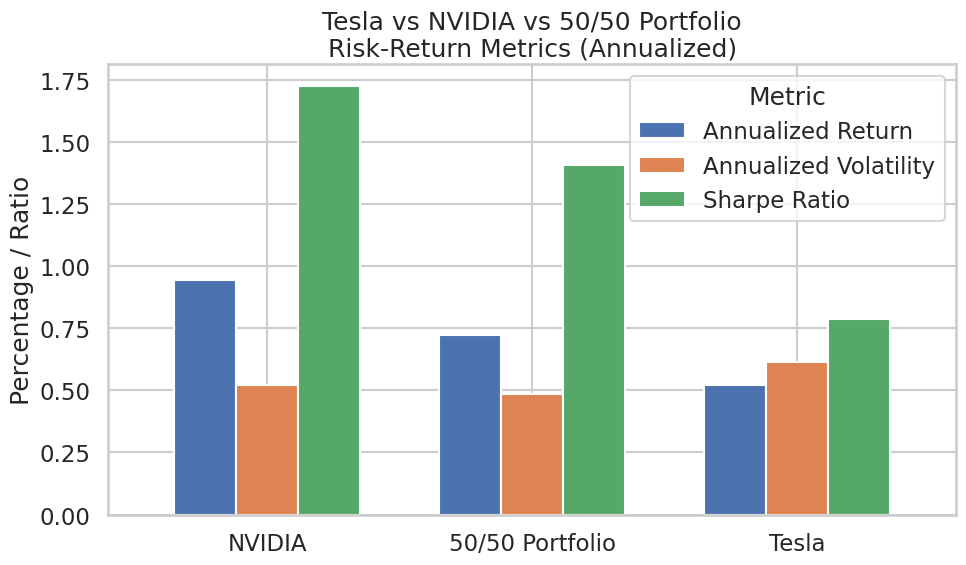

In [12]:
# --- Visualization: Bar Chart Comparison ---

plt.figure(figsize=(10,6))
metrics_df.plot(kind="bar", figsize=(10,6), rot=0, width=0.7)
plt.title("Tesla vs NVIDIA vs 50/50 Portfolio\nRisk-Return Metrics (Annualized)")
plt.ylabel("Percentage / Ratio")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


## 🔍 Key Insights

### 1. Performance Highlights  
- **Highest Annualized Return:** **NVIDIA (94.20%)** — Massive upside, fueled by explosive AI-driven growth and market dominance.  
- **Best Risk-Adjusted Return (Sharpe):** **NVIDIA (1.73)** — Strong returns per unit of risk, showing that its volatility was well-compensated by performance.  
- **Lowest Volatility:** **50/50 Portfolio (48.53%)** — Diversification paid off. Pairing Tesla’s volatility with NVIDIA’s returns smoothed out the ride.

### 2. What This Tells Us  
NVIDIA has been the clear winner over the last five years — not just in returns, but in *risk efficiency*. Tesla’s wild swings make it exciting but less predictable. Meanwhile, a simple **50/50 mix** offers a strong middle ground: meaningful growth with better stability.  

### 3. Big Takeaway  
Balancing high-growth stocks with complementary volatility patterns can produce portfolios that *feel* less risky but still capture major upside — a key lesson for both **investors and FP&A professionals** thinking about risk-weighted performance.


## Final Insights Recap

- **NVIDIA significantly outperformed Tesla** over the period, delivering a **cumulative return of ~278%** versus Tesla’s **78%**.  
- **Annualized returns** show the same pattern: NVDA at **148%** vs TSLA at **73%**, but with **lower volatility** (53% vs 66%).  
- Tesla experienced **deeper drawdowns (-54%)**, compared to NVDA’s **-37%**, making NVDA more resilient during downturns.  
- The **Sharpe ratios (rf = 0)** clearly tilt toward NVIDIA (279%) over Tesla (111%), showing **better risk-adjusted performance**.  
- A **50/50 blended portfolio** ended with a final value of **~82,266**, compared to ~30,993 for Tesla alone and ~134,810 for NVIDIA.  
  - This diversification smoothed volatility and drawdowns while still compounding strongly.  
- By year breakdown (2020–2025):  
  - **NVIDIA posted stronger yearly returns** in 2021, 2023, 2024, and 2025.  
  - **Tesla struggled in 2022** with deeper losses than NVDA.  
- **Takeaway:** NVIDIA was the superior single-asset performer, but a **balanced portfolio delivered steadier risk-adjusted results** — a practical lesson in diversification and portfolio construction.
